미분과 수치미분 개념

**수학적 미분 (Analytical Differentiation)**

$$
f(x) = x^2 \Rightarrow f'(x) = 2x
$$

* 수학적으로 정확한 **도함수**를 구함
* 함수의 변화율을 계산하는 공식 기반 미분

**수치미분 (Numerical Differentiation)**
$$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
$$
* 도함수를 직접 구하지 않고, **근사값으로 기울기를 계산**
* 여기서 $h$는 아주 작은 수 (예: $h = 1e-4$)
* 실제 계산 과정을 코드로 볼 수 있어 **직관적**

**미분 vs 수치미분 비교표**

| 항목    | 수학적 미분 (Analytical) | 수치미분 (Numerical)          |
| ----- | ------------------- | ------------------------- |
| 정의 방식 | 공식에 따라 도함수 계산       | 근사값으로 기울기 계산              |
| 정확도   | 매우 정확함              | 근사값, 오차 발생 가능             |
| 속도    | 빠름                  | 느림 (함수값 여러 번 계산 필요)       |
| 용도    | 모델 학습, 역전파 계산       | 디버깅, 검증용 (Gradient Check) |

**수치미분 방식비교**

> 중앙차분(Central Difference) 방식이 가장 보편적으로 사용된다.

| 방식   | 수식                                           | 정확도    | 계산 비용 | 특징         |
| ---- | -------------------------------------------- | ------ | ----- | ---------- |
| 전진차분 | $f'(x) \approx \frac{f(x+h) - f(x)}{h}$    | 1차 정확도 | 낮음    | 간단하지만 오차 큼 |
| 후진차분 | $f'(x) \approx \frac{f(x) - f(x-h)}{h}$    | 1차 정확도 | 낮음    | 전진과 비슷     |
| 중앙차분 | $f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$ | 2차 정확도 | 높음    | 정확하고 균형잡힘  |


In [9]:
import numpy as np

### 1차원 함수의 수치미분

In [10]:
def f(x):
    return x ** 2

def analytical_d(x):
    return 2 * x

def num_d_forward(f, x, h=1e-5):
    return ((f(x + h)) - f(x)) / h

def num_d_backward(f, x, h=1e-5):
    return ((f(x) - f(x - h))) / h

def num_d_central(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

x = 3.0

print(analytical_d(x))
print(num_d_forward(f, x))
print(num_d_backward(f, x))
print(num_d_central(f, x))


6.0
6.000009999951316
5.999990000127297
6.000000000039306


### 다변수 함수의 수치 미분

In [11]:
def f(x, y):
    return x ** 2 + y ** 2

def partial_d(f, x, y, var='x', h=1e-5):
    if var == 'x':
        return (f(x + h, y) - f(x - h, y)) / (2 * h)
    else:
        return (f(x, y + h) - f(x, y - h)) / (2 * h)
 

In [12]:
print(partial_d(f, 3.0, 2.0, var='x'))
print(partial_d(f, 3.0, 2.0, var='y'))

6.000000000039306
4.000000000026205


In [13]:
def f_multi(x):
    return np.sum(x ** 2)

def analytical_gradient(x):
    return 2 * x

In [15]:
def num_d_gradient(f, x, h=1e-5):
    grad = np.zeros_like(x)
    for idx in range(len(x)):
        tmp = x[idx]
        x[idx] = tmp + h
        f_plus = f(x)

        x[idx] = tmp - h
        f_minus = f(x)
        
        grad[idx] = (f_plus - f_minus) / (2 * h)
        x[idx] = tmp
    return grad

x = np.array([1.0, 2.0, 3.0])
print(analytical_gradient(x))
print(num_d_gradient(f_multi, x))

[2. 4. 6.]
[2. 4. 6.]


### 간단한 신경망의 기울기

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_pass(x, params):
    W1, b1, W2, b2 = params
    z1 = np.dot(x, W1) + b1
    r1 = sigmoid(z1)
    z2 = np.dot(r1, W2) + b2
    r2 = sigmoid(z2)
    return r2

def loss(r2, y):
    return 0.5 * np.sum((r2 - y) ** 2)

def get_loss(params, x, y):
    r2 = forward_pass(x, params)
    return loss(r2, y)

def num_d_gradient_params(f, params, x, y, h=1e-5):
    grads = []

    for param in params:
        grad = np.zeros_like(param)
        iter = np.nditer(param, flags=['multi_index'], op_flags=['readwrite'])


        while not iter.finished:
            idx = iter.multi_index
            origin_val = param[idx]
            param[idx] = origin_val + h
            f_plus = f(params, x, y)
            param[idx] = origin_val - h
            f_minus = f(params, x, y)
            grad[idx] = (f_plus - f_minus) / (2 * h)
            param[idx] = origin_val
            iter.iternext()

        grads.append(grad)
    return grads

In [18]:
np.random.seed(0)
input_size = 2
hidden_size = 3
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.random.randn(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.random.randn(output_size)
params = [W1, b1, W2, b2]

x = np.array([0.5, -0.2])
y = np.array([1.0])

num_grads = num_d_gradient_params(get_loss, params, x, y)

for i, grad in enumerate(num_grads):
    print(f'{i}번째 파라미터 수치 미분 기울기: \n{grad}')

0번째 파라미터 수치 미분 기울기: 
[[-3.59076788e-04 -1.91454872e-04 -1.82558270e-03]
 [ 1.43630717e-04  7.65819482e-05  7.30233079e-04]]
1번째 파라미터 수치 미분 기울기: 
[-0.00071815 -0.00038291 -0.00365117]
2번째 파라미터 수치 미분 기울기: 
[[-0.00872872]
 [-0.00457938]
 [-0.00700196]]
3번째 파라미터 수치 미분 기울기: 
[-0.01091606]


### h값에 따른 영향

In [19]:
def f(x):
    return x ** 2

def analytical_d(x):
    return 2 * x

def num_d_central(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

x = 3.0
h_values = np.logspace(-10, -1, 50)
errors = []

true_d = analytical_d(x)
for h in h_values:
    num_d = num_d_central(f, x, h)
    error = np.abs(num_d - true_d)
    errors.append(error)

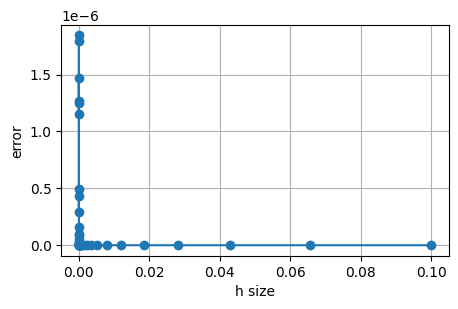

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.loglog(h_values, errors, marker='o') # x,y 축 모두 log 기준으로 (로그10)
# plt.plot(h_values, errors, marker='o')
plt.xlabel('h size')
plt.ylabel('error')
plt.grid(True)
plt.show()

### 자동 미분

In [21]:
import torch
x = torch.tensor(3.0, requires_grad=True)
y = f(x)
y.backward()

print(analytical_d(3.0))
print(x.grad)

6.0
tensor(6.)
